# Price Elasticity Analysis - Notebook 3: Exploratory Data Analysis

This notebook explores the cleaned data to understand patterns and relationships relevant to price elasticity analysis.

## Objectives
- Explore price and quantity distributions
- Analyze temporal patterns and seasonality
- Investigate relationships between price and demand
- Identify patterns by product category
- Generate initial insights for modeling

In [8]:
# Data refreshed: 2025-06-24
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# Add project root to Python path so we can import src modules
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

from src.utils.data_helpers import load_cleaned_data, get_cleaned_data_summary
from src.utils.plot_helpers import setup_plot_style, plot_distribution

# Configure plotting
setup_plot_style()

print("Libraries imported successfully!")

Libraries imported successfully!


In [11]:
# ==========================================
# PHASE 1: LOAD CLEANED DATA
# ==========================================

print("🔄 Loading cleaned data...")

try:
    # First try auto-detection
    df_clean = load_cleaned_data()
    
except Exception as e:
    print(f"Auto-detection failed: {e}")
    print("Trying explicit path...")
    
    # Fallback: try explicit path from notebook directory
    try:
        df_clean = load_cleaned_data("../data/processed/iri_sales_data_clean.parquet")
    except Exception as e2:
        print(f"Explicit path also failed: {e2}")
        print("Trying direct pandas load...")
        
        # Last resort: direct pandas load
        import pandas as pd
        df_clean = pd.read_parquet("../data/processed/iri_sales_data_clean.parquet")

print(f"✅ Loaded {len(df_clean):,} rows and {len(df_clean.columns)} columns")
print(f"📊 Data shape: {df_clean.shape}")

# Get comprehensive summary
summary = get_cleaned_data_summary(df_clean)

print("\n📋 CLEANED DATA SUMMARY:")
print("=" * 50)
print(f"Total records: {summary['total_records']:,}")
print(f"Date range: {summary['date_range']['start']} to {summary['date_range']['end']}")
print(f"Time periods: {summary['date_range']['total_weeks']} weeks")
print(f"Geographic regions: {summary['geographic_coverage']['regions']}")
print(f"Unique products: {summary['product_coverage']['products']}")
print(f"Average unit price: ${summary['sales_metrics']['avg_unit_price']:.2f}")
print(f"Price range: ${summary['sales_metrics']['price_range']['min']:.2f} - ${summary['sales_metrics']['price_range']['max']:.2f}")

# Display sample data
print("\n🔍 SAMPLE CLEANED DATA:")
display(df_clean.head(3))

ERROR:src.utils.data_helpers:Error loading cleaned data from data/processed/iri_sales_data_clean.parquet: [Errno 2] No such file or directory: 'data/processed/iri_sales_data_clean.parquet'


🔄 Loading cleaned data...
Auto-detection failed: [Errno 2] No such file or directory: 'data/processed/iri_sales_data_clean.parquet'
Trying explicit path...


INFO:src.utils.data_helpers:Loaded cleaned data: 1905890 rows, 37 columns from ../data/processed/iri_sales_data_clean.parquet


✅ Loaded 1,905,890 rows and 37 columns
📊 Data shape: (1905890, 37)

📋 CLEANED DATA SUMMARY:
Total records: 1,905,890
Date range: 2022-01-02 00:00:00 to 2025-06-08 00:00:00
Time periods: 180 weeks
Geographic regions: 86
Unique products: 3575
Average unit price: $3.93
Price range: $0.89 - $17.82

🔍 SAMPLE CLEANED DATA:


,ID,geography,product_name,time_original,Geography Key,Product Key,quantity_sold,Unit Sales Year Ago,Unit Sales 2 Years Ago,Unit Sales 3 Years Ago,...,Dollar Sales 2 Years Ago,Dollar Sales 3 Years Ago,Incremental Dollars,Base Dollar Sales,Unit Sales per Pt of Distribution,Weighted Average Base Price Per Unit,Opportunity Dollars,Dollar Trade Efficiency,Unit Trade Efficiency,date
0,10147576,Total US - Multi Outlet,ACE OF DIAMONDS CHUNK LIGHT WATER 5 OZ 1 CT CA...,Week Ending 12-31-23,609857.0,452471233:225241880:59659909:460977384:7080095...,64.0,13.0,165.0,1132.0,...,186.0,937.0,0.0,106.0,970.0,1.67,270117.0,NaN,NaN,2023-12-31
1,10147577,Total US - Multi Outlet,ACE OF DIAMONDS CHUNK LIGHT WATER 5 OZ 1 CT CA...,Week Ending 01-07-24,609857.0,452471233:225241880:59659909:460977384:7080095...,20.0,21.0,185.0,1816.0,...,170.0,1534.0,0.0,32.0,527.0,1.62,152402.0,NaN,NaN,2024-01-07
2,10147578,Total US - Multi Outlet,CHICKEN OF THE SEA CHUNK LIGHT OIL 12 OZ 1 CT ...,Week Ending 12-31-23,609857.0,452471233:225241880:59659909:460977384:7080095...,8431.0,12740.0,16067.0,22362.0,...,39876.0,57626.0,53.0,24969.0,424.0,2.97,237774.0,0.21,0.19,2023-12-31


In [12]:
# ==========================================
# PHASE 2: EXPLORE KEY VARIABLES
# ==========================================

print("\n📊 EXPLORING KEY VARIABLES...")

# Key variables for elasticity analysis
key_vars = ['quantity_sold', 'unit_price', 'revenue', 'volume']

print("\n📈 DISTRIBUTION ANALYSIS:")
for var in key_vars:
    if var in df_clean.columns:
        print(f"\n{var.upper()}:")
        print(f"  Mean: {df_clean[var].mean():,.2f}")
        print(f"  Median: {df_clean[var].median():,.2f}")
        print(f"  Std: {df_clean[var].std():,.2f}")
        print(f"  Min: {df_clean[var].min():,.2f}")
        print(f"  Max: {df_clean[var].max():,.2f}")


📊 EXPLORING KEY VARIABLES...

📈 DISTRIBUTION ANALYSIS:

QUANTITY_SOLD:
  Mean: 2,894.97
  Median: 224.00
  Std: 10,015.57
  Min: 1.00
  Max: 75,535.11

UNIT_PRICE:
  Mean: 3.93
  Median: 2.99
  Std: 3.07
  Min: 0.89
  Max: 17.82

REVENUE:
  Mean: 9,023.61
  Median: 715.00
  Std: 50,487.96
  Min: 0.00
  Max: 5,525,620.00

VOLUME:
  Mean: 27,605.05
  Median: 1,222.00
  Std: 204,293.01
  Min: 0.00
  Max: 28,696,318.00



🔍 ANALYZING PRICE-QUANTITY RELATIONSHIPS...


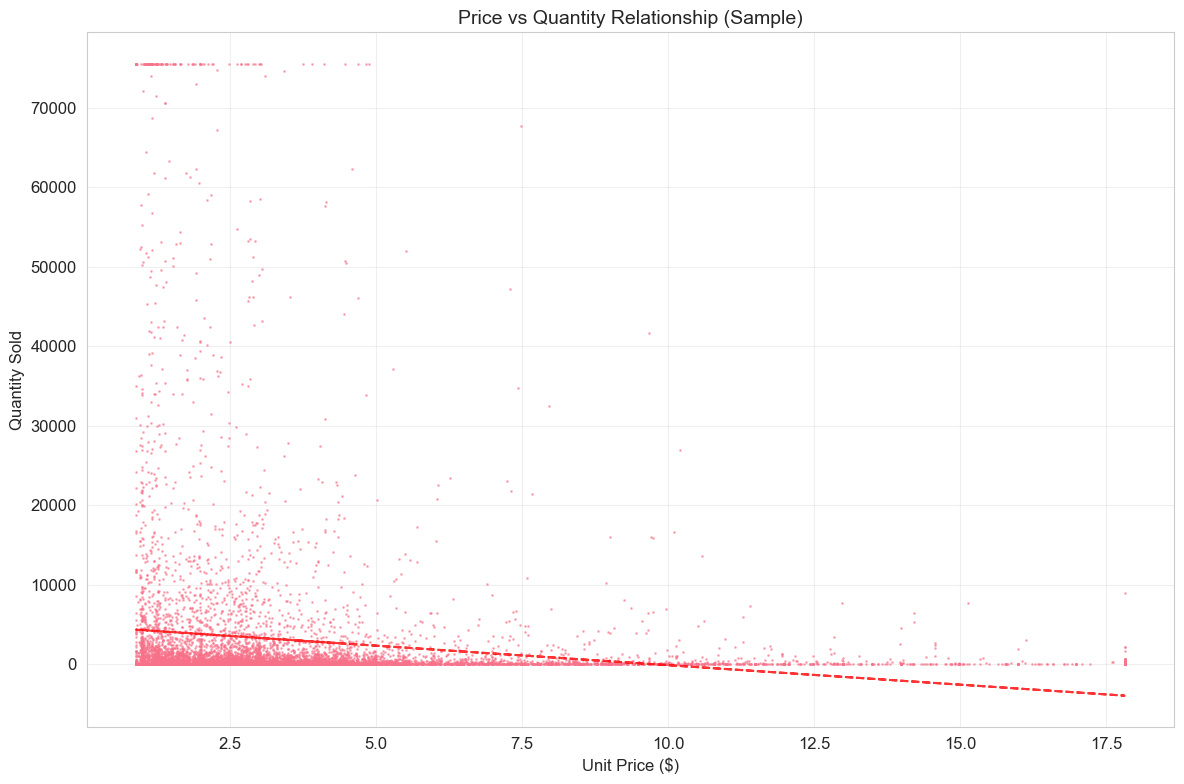

📊 Price-Quantity Correlation: -0.139


In [13]:
# ==========================================
# PHASE 3: PRICE-QUANTITY RELATIONSHIP
# ==========================================

print("\n🔍 ANALYZING PRICE-QUANTITY RELATIONSHIPS...")

# Create scatter plot of price vs quantity
plt.figure(figsize=(12, 8))

# Sample data for visualization (full dataset is too large)
sample_size = min(10000, len(df_clean))
df_sample = df_clean.sample(n=sample_size, random_state=42)

plt.scatter(df_sample['unit_price'], df_sample['quantity_sold'], 
           alpha=0.5, s=1)
plt.xlabel('Unit Price ($)')
plt.ylabel('Quantity Sold')
plt.title('Price vs Quantity Relationship (Sample)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_sample['unit_price'], df_sample['quantity_sold'], 1)
p = np.poly1d(z)
plt.plot(df_sample['unit_price'], p(df_sample['unit_price']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df_clean['unit_price'].corr(df_clean['quantity_sold'])
print(f"📊 Price-Quantity Correlation: {correlation:.3f}")


📅 ANALYZING TEMPORAL PATTERNS...
📊 Temporal aggregation: 180 time periods


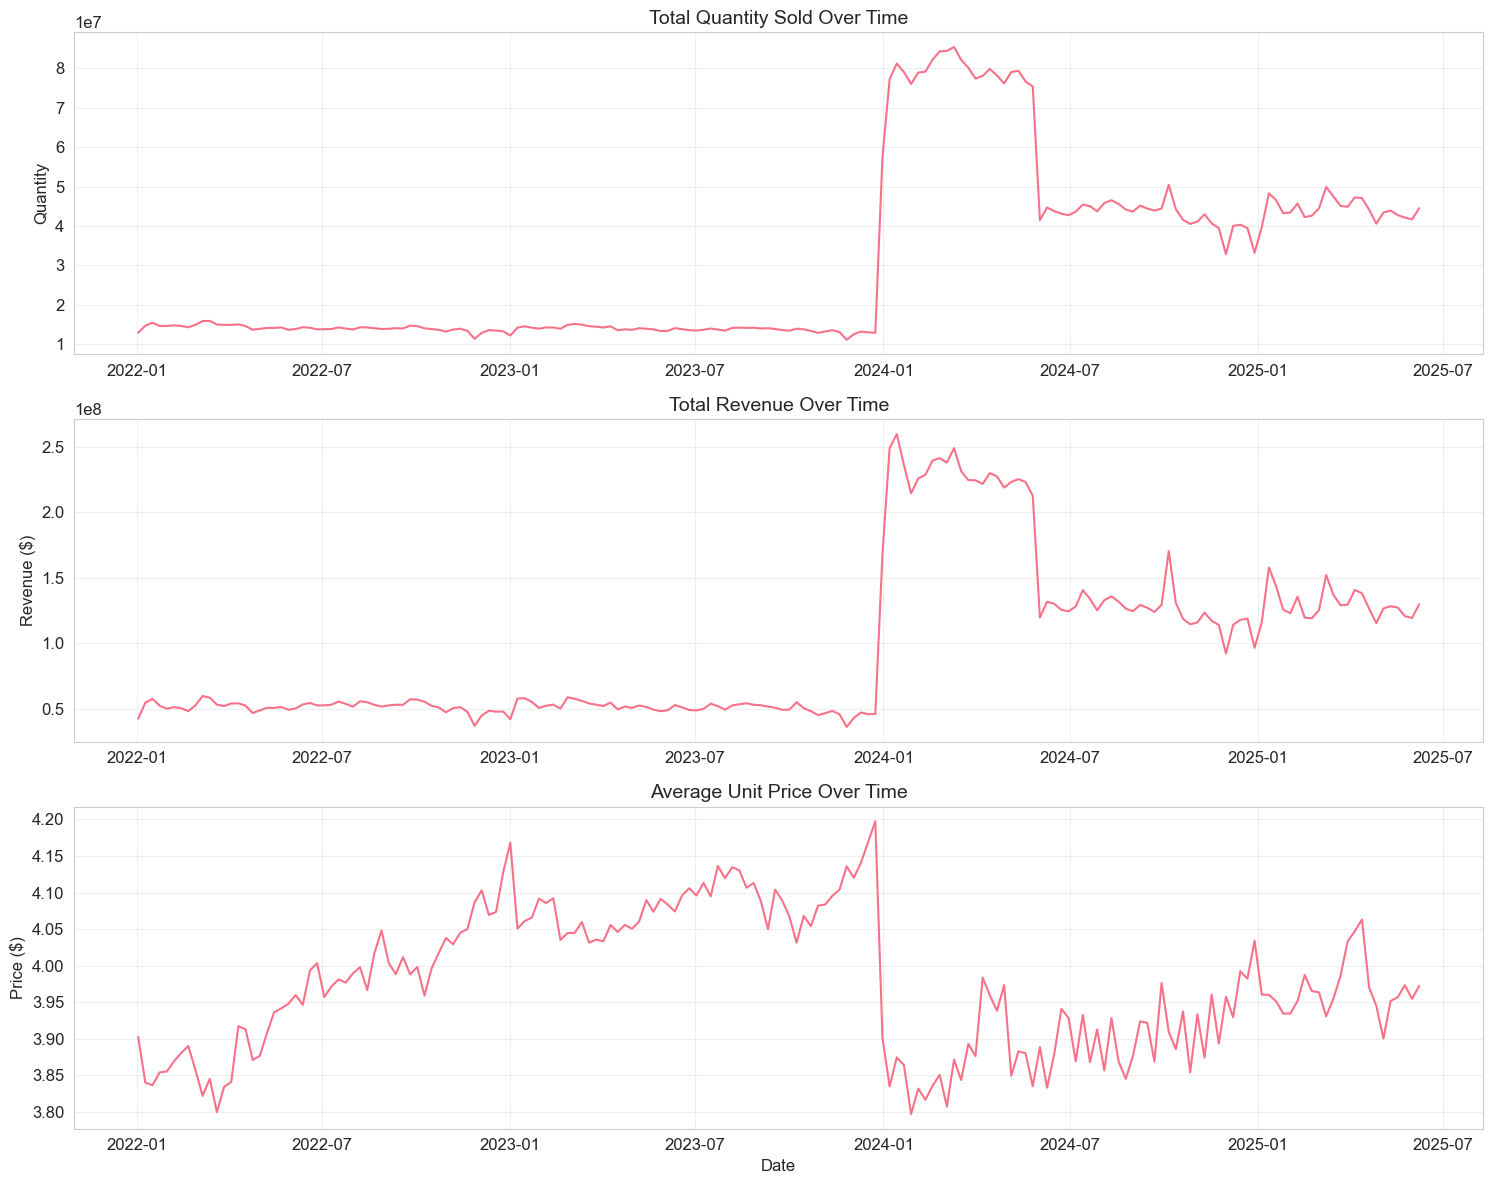

In [14]:
# ==========================================
# PHASE 4: TEMPORAL ANALYSIS
# ==========================================

print("\n📅 ANALYZING TEMPORAL PATTERNS...")

# Aggregate by date to see trends
df_temporal = df_clean.groupby('date').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum',
    'unit_price': 'mean'
}).reset_index()

print(f"📊 Temporal aggregation: {len(df_temporal)} time periods")

# Plot time series
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Quantity over time
axes[0].plot(df_temporal['date'], df_temporal['quantity_sold'])
axes[0].set_title('Total Quantity Sold Over Time')
axes[0].set_ylabel('Quantity')
axes[0].grid(True, alpha=0.3)

# Revenue over time
axes[1].plot(df_temporal['date'], df_temporal['revenue'])
axes[1].set_title('Total Revenue Over Time')
axes[1].set_ylabel('Revenue ($)')
axes[1].grid(True, alpha=0.3)

# Average price over time
axes[2].plot(df_temporal['date'], df_temporal['unit_price'])
axes[2].set_title('Average Unit Price Over Time')
axes[2].set_ylabel('Price ($)')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [15]:
# ==========================================
# PHASE 5: PRODUCT CATEGORY ANALYSIS
# ==========================================

print("\n🏷️ ANALYZING PRODUCT CATEGORIES...")

# Top products by total quantity
top_products = df_clean.groupby('product_name').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum',
    'unit_price': 'mean'
}).sort_values('quantity_sold', ascending=False).head(10)

print("📊 TOP 10 PRODUCTS BY QUANTITY:")
display(top_products)

# Product price ranges
product_price_stats = df_clean.groupby('product_name')['unit_price'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).sort_values('mean', ascending=False)

print("\n📊 PRODUCT PRICE STATISTICS (Top 10 by avg price):")
display(product_price_stats.head(10))


🏷️ ANALYZING PRODUCT CATEGORIES...
📊 TOP 10 PRODUCTS BY QUANTITY:


,quantity_sold,revenue,unit_price
product_name,,,
STARKIST CHUNK LIGHT WATER 5 OZ 1 CT CAN REGULAR - 00018000000673,96016568.21,519504462.0,1.241857
CHICKEN OF THE SEA CHUNK LIGHT WATER 5 OZ 1 CT CAN REGULAR - 00014800000245,73651148.71,246385827.0,1.200221
STARKIST CHUNK LIGHT WATER 2.6 OZ 1 CT POUCH REGULAR - 00018000049524,71749741.31,312112800.0,1.461035
BUMBLE BEE SOLID WHITE WATER 5 OZ 1 CT CAN REGULAR - 00028660000005,61858396.58,512931904.0,2.251701
STARKIST SOLID WHITE WATER 5 OZ 1 CT CAN REGULAR - 00028000000672,59292341.00,282508512.0,1.988998
STARKIST CHUNK LIGHT OIL 5 OZ 1 CT CAN REGULAR - 00018000000674,58963330.74,194970129.0,1.239357
STARKIST TUNA CREATIONS CHUNK LIGHT MARINATED 2.6 OZ 1 CT POUCH LEMON PEPPER - 00018000051309,57394551.88,199159729.0,1.467739
BUMBLE BEE CHUNK LIGHT WATER 5 OZ 1 CT CAN REGULAR - 00038660000020,46413203.98,137251409.0,1.336579
STARKIST TUNA CREATIONS CHUNK LIGHT MARINATED 2.6 OZ 1 CT POUCH SWEET & SPICY - 00018000051308,46381330.73,129703917.0,1.464904



📊 PRODUCT PRICE STATISTICS (Top 10 by avg price):


,count,mean,std,min,max
product_name,,,,,
ALASKA SMOKEHOUSE SALMON RED SALMON FILLET NOT STATED 16 OZ 1 CT BOX SMOKED - 00022388283101,376,17.82,0.0,17.82,17.82
ALASKA SMOKEHOUSE SALMON AO SALMON NOT STATED NOT STATED 16 OZ 1 CT BOX REGULAR - 00072388283014,288,17.82,0.0,17.82,17.82
FISHERMANS PRIDE SNAIL NOT STATED 29 OZ 1 CT CAN REGULAR - 00034699458472,295,17.82,0.0,17.82,17.82
GENOVA NOT STATED LIGHT OIL 60 OZ 12 CT CAN NOT STATED - 27013001672818,12,17.82,0.0,17.82,17.82
GENOVA SOLID LIGHT OIL 60 OZ 12 CT CAN CALABRIAN CHILI - 27013000543898,12,17.82,0.0,17.82,17.82
GENOVA SOLID LIGHT OIL 60 OZ 12 CT CAN GARLIC & TUSCAN HERB - 27013000541189,12,17.82,0.0,17.82,17.82
GENOVA SOLID LIGHT OIL 60 OZ 12 CT CAN LEMON & HERBES DE PROVENCE - 27013000541190,6,17.82,0.0,17.82,17.82
GENOVA ALL OTHER LIGHT WATER 60 OZ 12 CT CAN REGULAR - 27013000056989,12,17.82,0.0,17.82,17.82
DOCTOR MKS NATURAL CAVIAR NOT STATED 1.25 OZ 1 CT ALL OTHER HOT & SPICY - 08016151900260,236,17.82,0.0,17.82,17.82


In [16]:
# ==========================================
# PHASE 6: GEOGRAPHIC ANALYSIS
# ==========================================

print("\n🌍 ANALYZING GEOGRAPHIC PATTERNS...")

# Geographic distribution
geo_stats = df_clean.groupby('geography').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum',
    'unit_price': 'mean'
}).sort_values('quantity_sold', ascending=False)

print("📊 TOP 10 REGIONS BY QUANTITY:")
display(geo_stats.head(10))


🌍 ANALYZING GEOGRAPHIC PATTERNS...
📊 TOP 10 REGIONS BY QUANTITY:


,quantity_sold,revenue,unit_price
geography,,,
Total US - Multi Outlet+,2.558970e+09,9.301364e+09,4.142822
Total US - Food,7.905323e+08,2.373303e+09,4.218675
WALMART CORP,3.678430e+08,8.779816e+08,2.843245
Total US - Multi Outlet,3.099982e+08,1.084153e+09,4.123442
KROGER CORP,1.653484e+08,3.521254e+08,4.109636
ABSCO CORP,8.290775e+07,2.098268e+08,4.593424
Northeast - Standard - Multi Outlet,7.411348e+07,2.041777e+08,4.019851
Southeast - Standard - Multi Outlet,6.552379e+07,1.588385e+08,3.549285
PUBLIX CORP,6.439806e+07,1.747209e+08,3.546107


In [17]:
# ==========================================
# PHASE 7: ELASTICITY INSIGHTS
# ==========================================

print("\n💡 INITIAL ELASTICITY INSIGHTS...")

# Calculate price elasticity at product level (simplified)
elasticity_insights = []

for product in df_clean['product_name'].unique()[:10]:  # Sample first 10 products
    product_data = df_clean[df_clean['product_name'] == product]
    
    if len(product_data) > 10:  # Need sufficient data points
        # Simple elasticity calculation: % change in quantity / % change in price
        price_changes = product_data['unit_price'].pct_change().dropna()
        quantity_changes = product_data['quantity_sold'].pct_change().dropna()
        
        if len(price_changes) > 0 and len(quantity_changes) > 0:
            # Align the series
            min_len = min(len(price_changes), len(quantity_changes))
            price_changes = price_changes.iloc[:min_len]
            quantity_changes = quantity_changes.iloc[:min_len]
            
            # Calculate elasticity (avoid division by zero)
            non_zero_price = price_changes != 0
            if non_zero_price.sum() > 0:
                elasticity = (quantity_changes[non_zero_price] / price_changes[non_zero_price]).mean()
                elasticity_insights.append({
                    'product': product,
                    'elasticity': elasticity,
                    'data_points': len(product_data)
                })

# Display elasticity insights
if elasticity_insights:
    elasticity_df = pd.DataFrame(elasticity_insights)
    elasticity_df = elasticity_df.sort_values('elasticity')
    
    print("📊 INITIAL ELASTICITY ESTIMATES (Sample Products):")
    display(elasticity_df)
    
    print(f"\n💡 ELASTICITY INTERPRETATION:")
    print(f"  Most elastic (price sensitive): {elasticity_df.iloc[0]['product']} ({elasticity_df.iloc[0]['elasticity']:.3f})")
    print(f"  Least elastic (price insensitive): {elasticity_df.iloc[-1]['product']} ({elasticity_df.iloc[-1]['elasticity']:.3f})")
else:
    print("⚠️ Insufficient data for elasticity calculation")


💡 INITIAL ELASTICITY INSIGHTS...
📊 INITIAL ELASTICITY ESTIMATES (Sample Products):


,product,elasticity,data_points
5,CHICKEN OF THE SEA CHUNK LIGHT WATER 5 OZ 1 CT...,-361.554697,3350
9,CHICKEN OF THE SEA SOLID LIGHT OIL 5 OZ 1 CT C...,-77.361312,213
8,CHICKEN OF THE SEA CHUNK LIGHT WATER 66.5 OZ 1...,-60.344598,422
4,CHICKEN OF THE SEA CHUNK LIGHT WATER 12 OZ 1 C...,-59.388073,4214
3,CHICKEN OF THE SEA CHUNK LIGHT OIL 5 OZ 1 CT C...,-36.464418,530
7,CHICKEN OF THE SEA CHUNK LIGHT WATER 5 OZ 1 CT...,-18.038205,384
6,CHICKEN OF THE SEA CHUNK LIGHT WATER 5 OZ 1 CT...,-4.132364,4761
0,ACE OF DIAMONDS CHUNK LIGHT WATER 5 OZ 1 CT CA...,-2.818653,191
1,CHICKEN OF THE SEA CHUNK LIGHT OIL 12 OZ 1 CT ...,220.531239,1186
2,CHICKEN OF THE SEA CHUNK LIGHT OIL 5 OZ 1 CT C...,686.433949,3787



💡 ELASTICITY INTERPRETATION:
  Most elastic (price sensitive): CHICKEN OF THE SEA CHUNK LIGHT WATER 5 OZ 1 CT CAN LOW SODIUM - 00014800025455 (-361.555)
  Least elastic (price insensitive): CHICKEN OF THE SEA CHUNK LIGHT OIL 5 OZ 1 CT CAN REGULAR - 00014800000195 (686.434)


In [18]:
# ==========================================
# PHASE 8: SUMMARY & NEXT STEPS
# ==========================================

print("\n📋 EDA SUMMARY & NEXT STEPS:")
print("=" * 50)
print("✅ Data exploration completed")
print("📊 Key patterns identified:")
print("   - Price-quantity correlation: {:.3f}".format(correlation))
print("   - Temporal coverage: {} weeks".format(summary['date_range']['total_weeks']))
print("   - Geographic coverage: {} regions".format(summary['geographic_coverage']['regions']))
print("   - Product coverage: {} products".format(summary['product_coverage']['products']))

print("\n🎯 NEXT STEPS:")
print("   1. Feature engineering for elasticity modeling")
print("   2. Product categorization and grouping")
print("   3. Advanced temporal feature creation")
print("   4. Model selection and training")
print("   5. Cross-validation and evaluation")

print("\n✅ EDA COMPLETE!")
print("📋 Next step: Run 04_feature_engineering.ipynb for feature creation")
print("=" * 50)


📋 EDA SUMMARY & NEXT STEPS:
✅ Data exploration completed
📊 Key patterns identified:
   - Price-quantity correlation: -0.139
   - Temporal coverage: 180 weeks
   - Geographic coverage: 86 regions
   - Product coverage: 3575 products

🎯 NEXT STEPS:
   1. Feature engineering for elasticity modeling
   2. Product categorization and grouping
   3. Advanced temporal feature creation
   4. Model selection and training
   5. Cross-validation and evaluation

✅ EDA COMPLETE!
📋 Next step: Run 04_feature_engineering.ipynb for feature creation
